In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from datetime import date
os.chdir('/kaggle/input/predict-energy-behavior-of-prosumers/')

In [2]:
os.listdir()

['client.csv',
 'gas_prices.csv',
 'electricity_prices.csv',
 'weather_station_to_county_mapping.csv',
 'example_test_files',
 'enefit',
 'public_timeseries_testing_util.py',
 'historical_weather.csv',
 'county_id_to_name_map.json',
 'train.csv',
 'forecast_weather.csv']

In [3]:
train_df = pd.read_csv('train.csv')
client_df = pd.read_csv('client.csv')
#forcast_weather_df = pd.read_csv('forecast_weather.csv')
historical_weather_df = pd.read_csv('historical_weather.csv')

In [4]:
with open('county_id_to_name_map.json', 'r') as file:
    # Load the JSON data
    county_id_to_name_map = json.load(file)

In [5]:
train_df.shape

(2018352, 9)

In [6]:
client_df.shape

(41919, 7)

In [7]:
historical_weather_df.shape

(1710802, 18)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_type        41919 non-null  int64  
 1   county              41919 non-null  int64  
 2   eic_count           41919 non-null  int64  
 3   installed_capacity  41919 non-null  float64
 4   is_business         41919 non-null  int64  
 5   date                41919 non-null  object 
 6   data_block_id       41919 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.2+ MB


In [10]:
historical_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710802 entries, 0 to 1710801
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   datetime                object 
 1   temperature             float64
 2   dewpoint                float64
 3   rain                    float64
 4   snowfall                float64
 5   surface_pressure        float64
 6   cloudcover_total        int64  
 7   cloudcover_low          int64  
 8   cloudcover_mid          int64  
 9   cloudcover_high         int64  
 10  windspeed_10m           float64
 11  winddirection_10m       int64  
 12  shortwave_radiation     float64
 13  direct_solar_radiation  float64
 14  diffuse_radiation       float64
 15  latitude                float64
 16  longitude               float64
 17  data_block_id           float64
dtypes: float64(12), int64(5), object(1)
memory usage: 234.9+ MB


In [11]:
train_df.head(10)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
5,0,0,3,656.859,1,2021-09-01 00:00:00,0,5,2
6,0,1,0,0.000,0,2021-09-01 00:00:00,0,6,3
7,0,1,0,59.000,1,2021-09-01 00:00:00,0,7,3
8,0,1,1,0.000,0,2021-09-01 00:00:00,0,8,4
9,0,1,1,501.760,1,2021-09-01 00:00:00,0,9,4


In [12]:
client_df.head(10)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
5,3,0,265,13417.79,1,2021-09-01,2
6,1,1,7,80.00,0,2021-09-01,2
7,3,1,42,472.60,0,2021-09-01,2
8,3,1,12,295.50,1,2021-09-01,2
9,3,2,33,414.50,0,2021-09-01,2


In [13]:
historical_weather_df.head(10)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0
5,2021-09-01 00:00:00,16.0,11.4,0.0,0.0,1016.7,15,12,7,0,6.388889,297,349.0,274.0,75.0,57.6,24.2,1.0
6,2021-09-01 00:00:00,12.2,10.5,0.0,0.0,1005.3,19,7,0,41,4.111111,359,0.0,0.0,0.0,57.6,24.7,1.0
7,2021-09-01 00:00:00,12.2,10.5,0.0,0.0,1006.1,28,8,0,68,4.111111,354,0.0,0.0,0.0,57.6,25.2,1.0
8,2021-09-01 00:00:00,12.4,10.6,0.0,0.0,1003.8,49,26,0,85,4.250000,352,0.0,0.0,0.0,57.6,25.7,1.0
9,2021-09-01 00:00:00,12.9,11.0,0.0,0.0,1003.7,81,56,3,96,4.250000,351,0.0,0.0,0.0,57.6,26.2,1.0


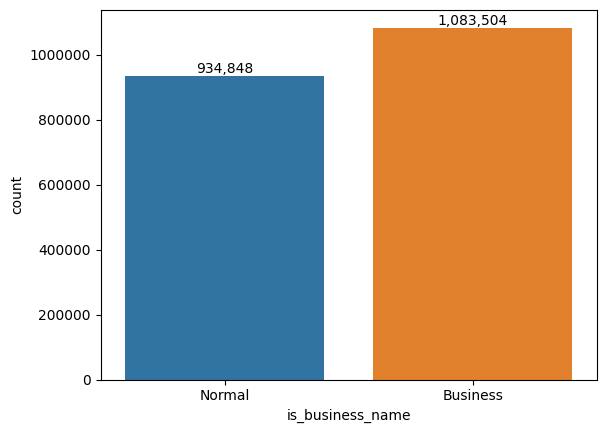

In [14]:
# Count of Normal and Business Prosumers

is_business_code_to_name_map = {'0' : 'Normal','1' : 'Business'}

train_df['is_business_name'] =  train_df['is_business'].astype('str').replace(is_business_code_to_name_map)

ax = sns.countplot(data=train_df,x='is_business_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

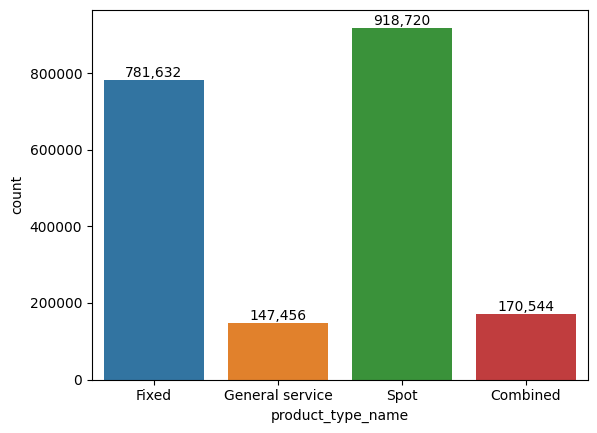

In [15]:
# Count of records of each product type

product_type_code_to_name_map = {'0': "Combined", '1': "Fixed", '2': "General service", '3': "Spot"}

train_df['product_type_name'] =  train_df['product_type'].astype('str').replace(product_type_code_to_name_map)

ax = sns.countplot(data=train_df,x='product_type_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

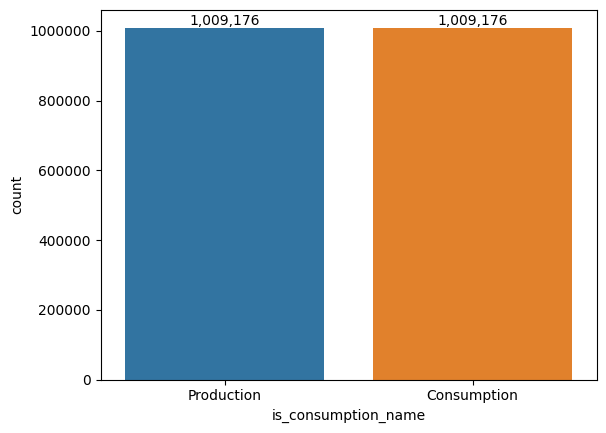

In [16]:
# Count of Production and Consumption

is_consumption_code_to_name_map = {'0' : 'Production','1' : 'Consumption'}

train_df['is_consumption_name'] =  train_df['is_consumption'].astype('str').replace(is_consumption_code_to_name_map)

ax = sns.countplot(data=train_df,x='is_consumption_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

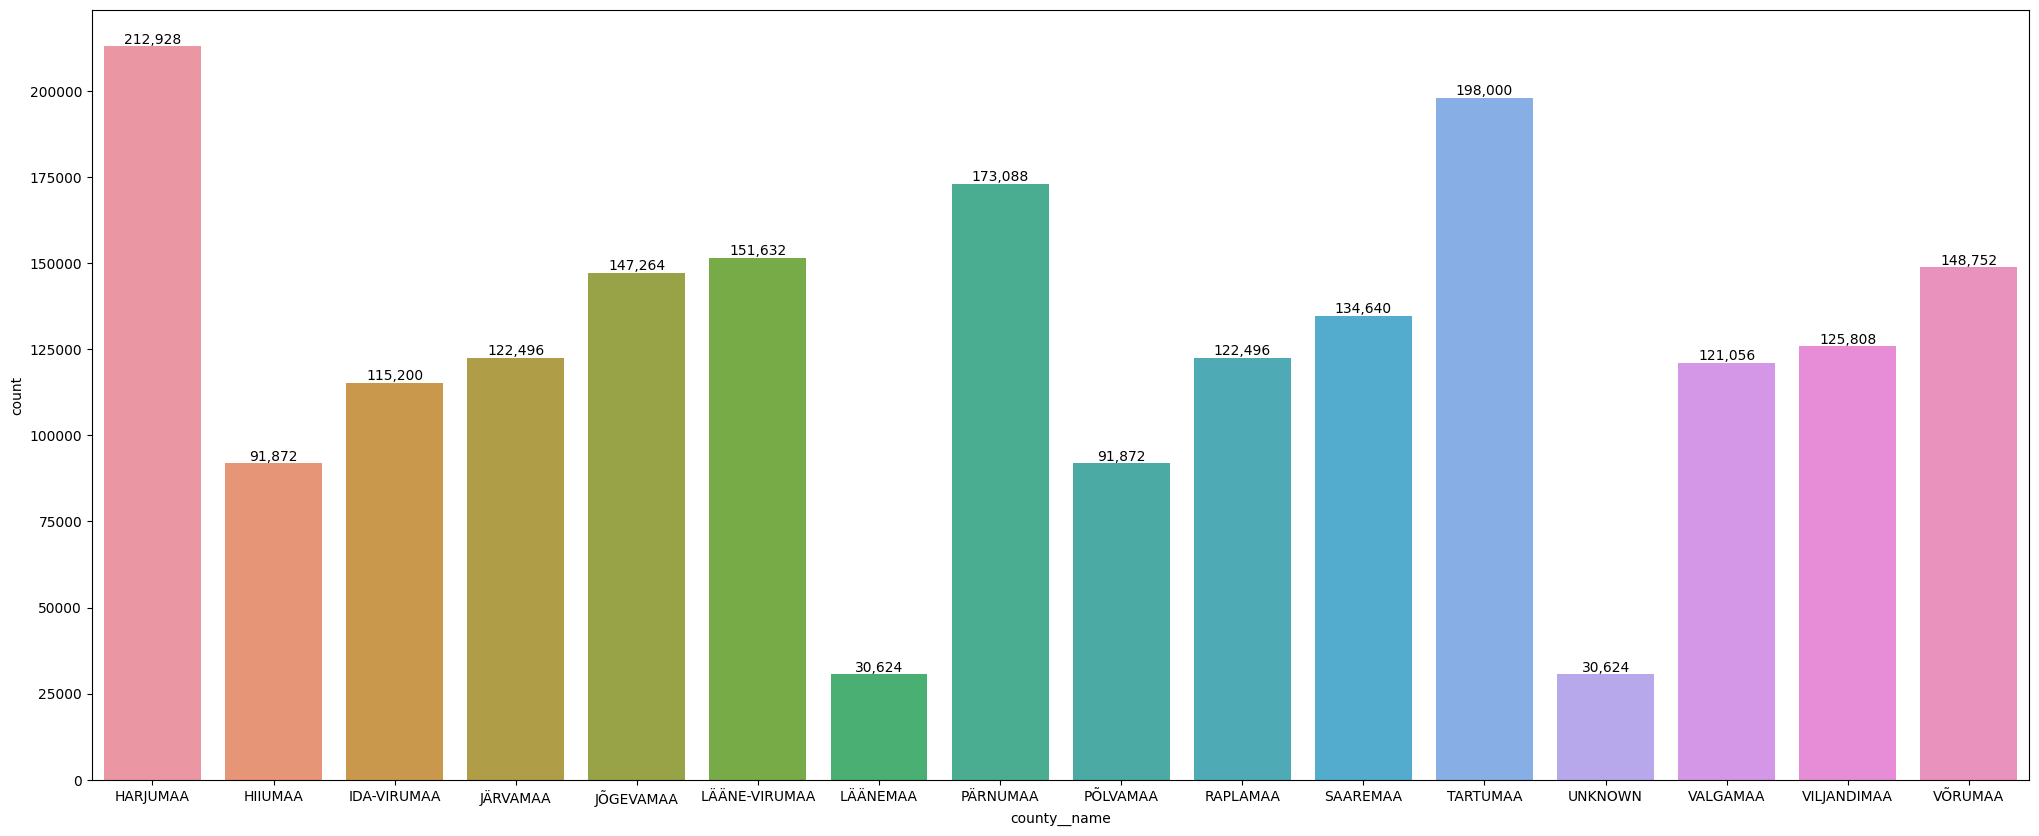

In [17]:
# Count of record for each county

train_df['county__name'] =  train_df['county'].astype('str').replace(county_id_to_name_map)

plt.figure(figsize=(25,10))
ax = sns.countplot(data=train_df,x='county__name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

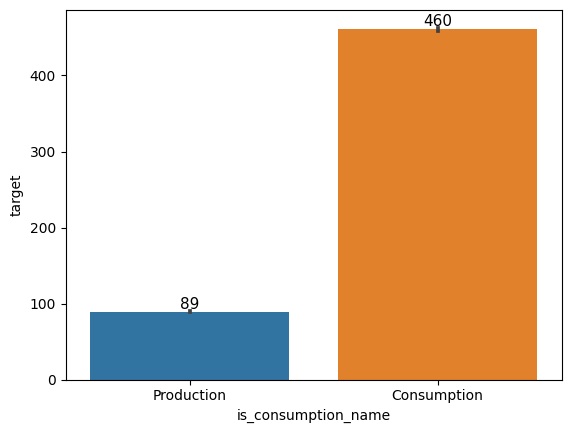

In [18]:
# Amount of Production & Consumption

ax = sns.barplot(data=train_df,x='is_consumption_name',y='target')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=11, color='black')

plt.show()

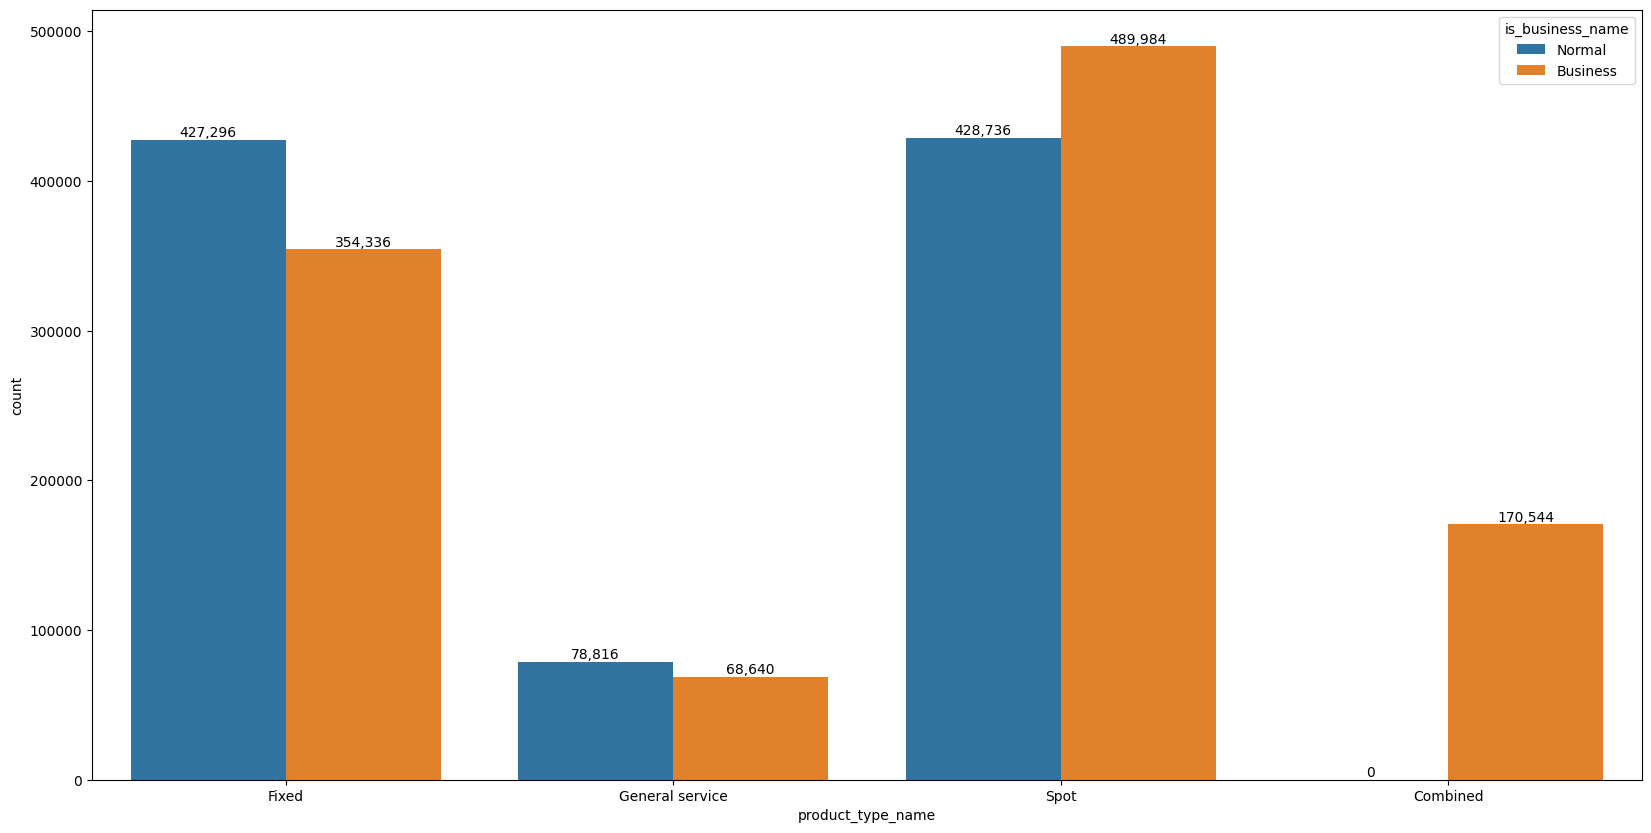

In [19]:
# Count of each product type according to normal or business use.

plt.figure(figsize=(20,10))

ax = sns.countplot(data=train_df,x='product_type_name',hue='is_business_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

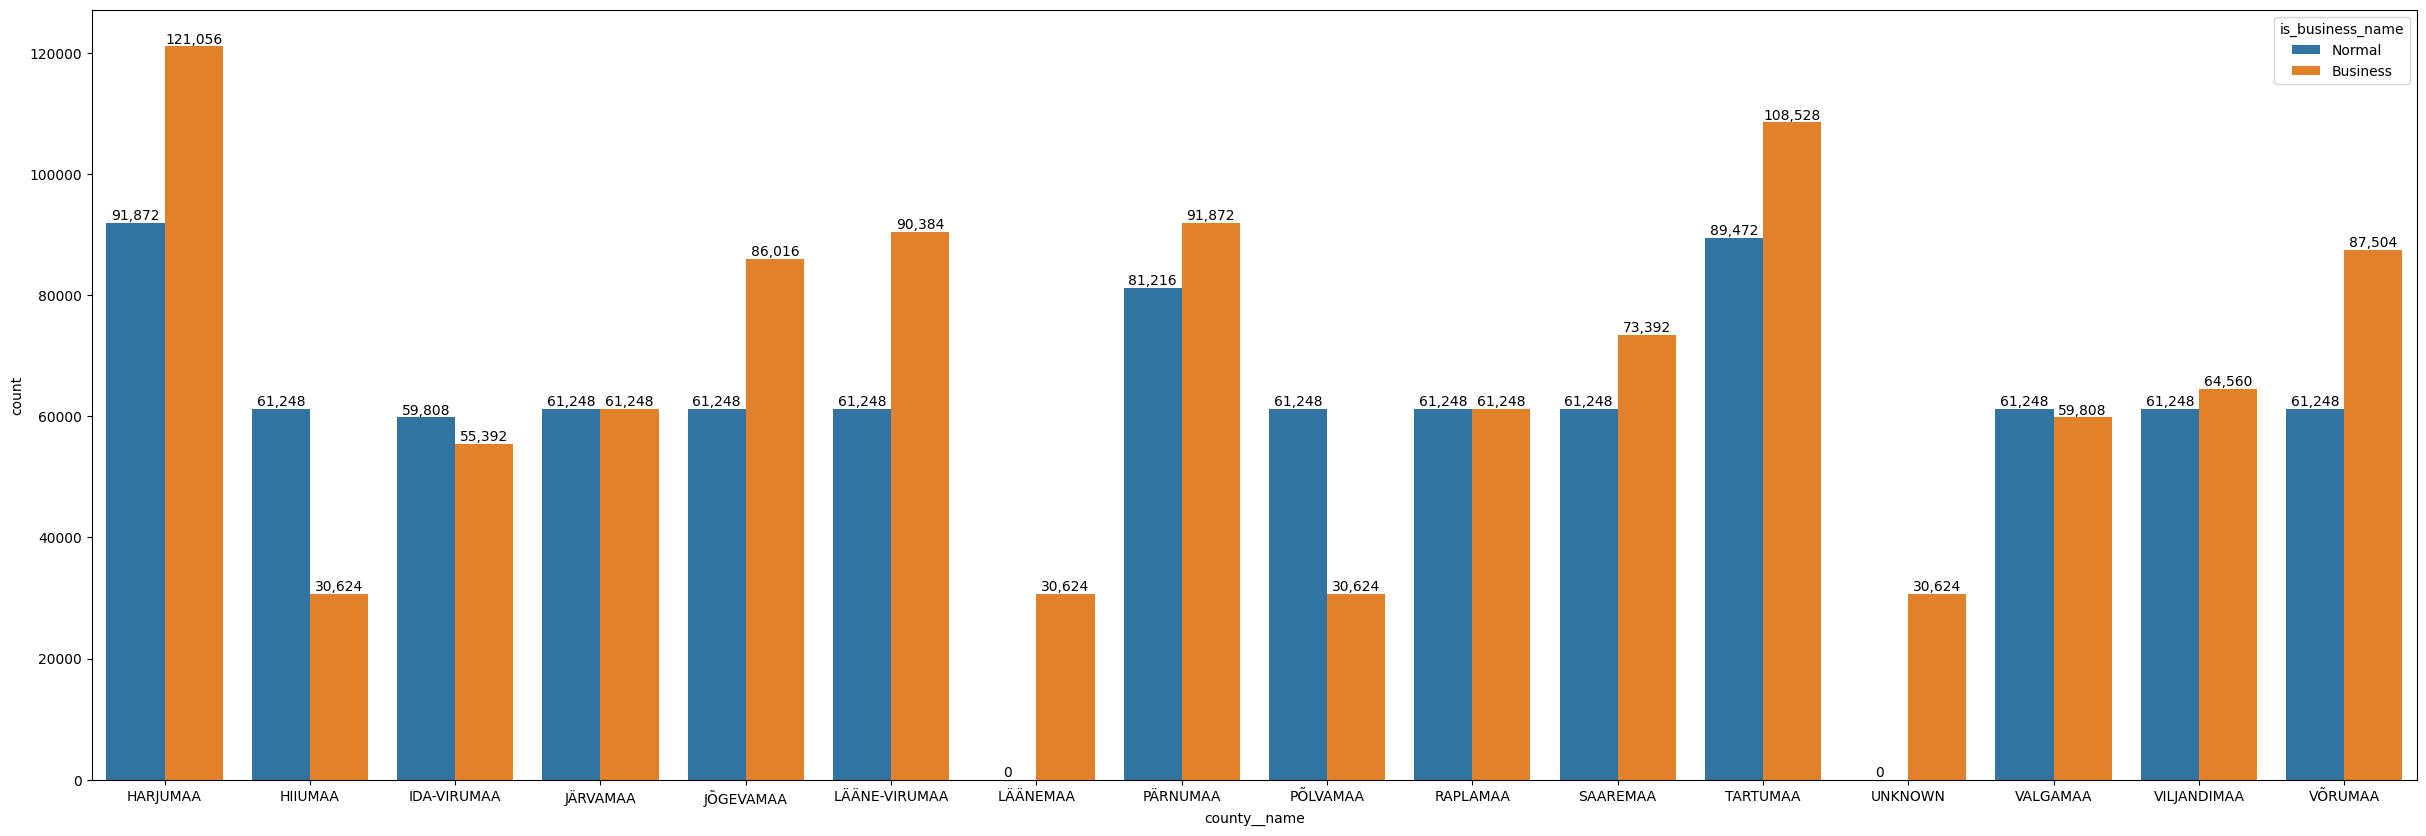

In [20]:
# Amount of Production & Consumption according to county

plt.figure(figsize=(30,10))
ax = sns.countplot(data=train_df,x='county__name',hue='is_business_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

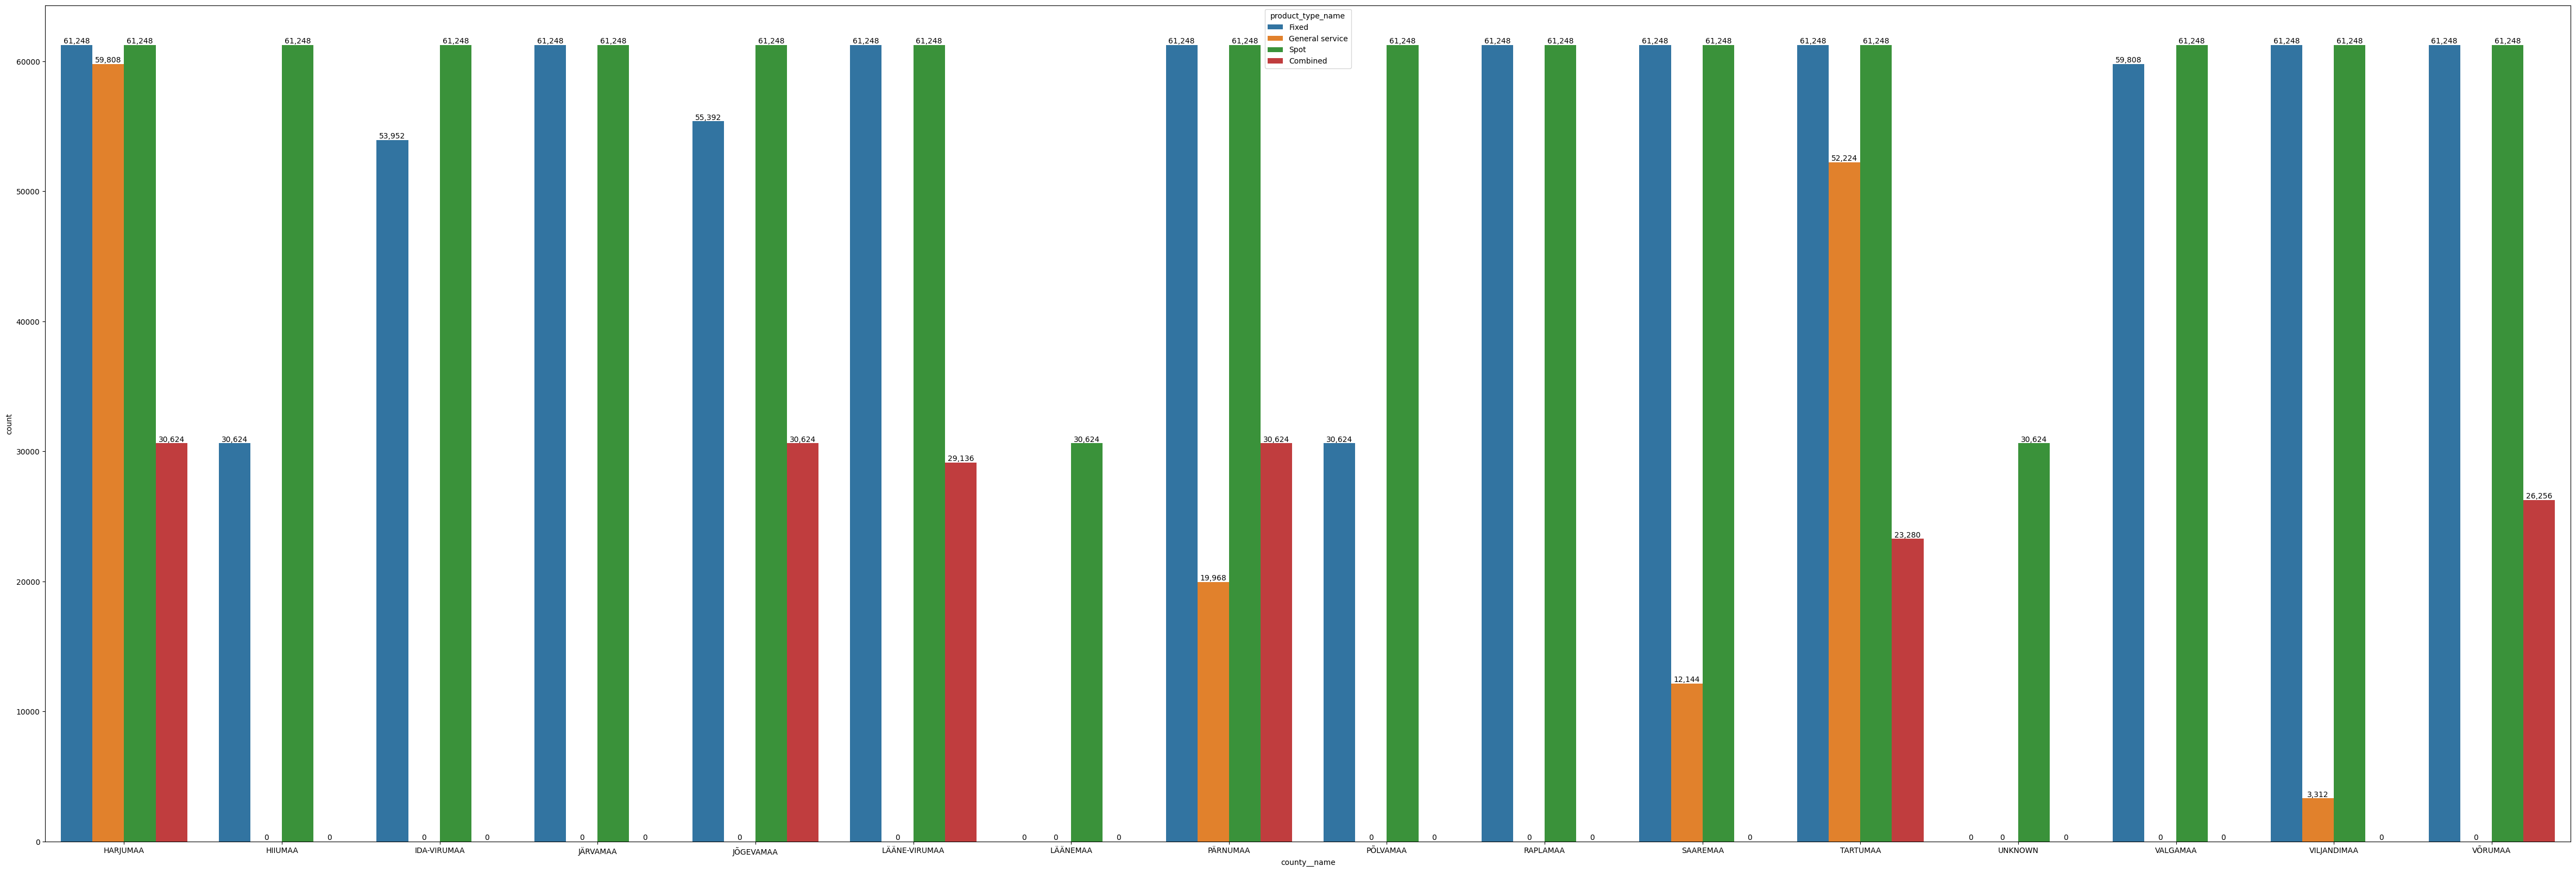

In [21]:
# Count of product of type according to county

plt.figure(figsize=(60,20))
ax = sns.countplot(data=train_df,x='county__name',hue='product_type_name')

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=10, color='black')

plt.show()

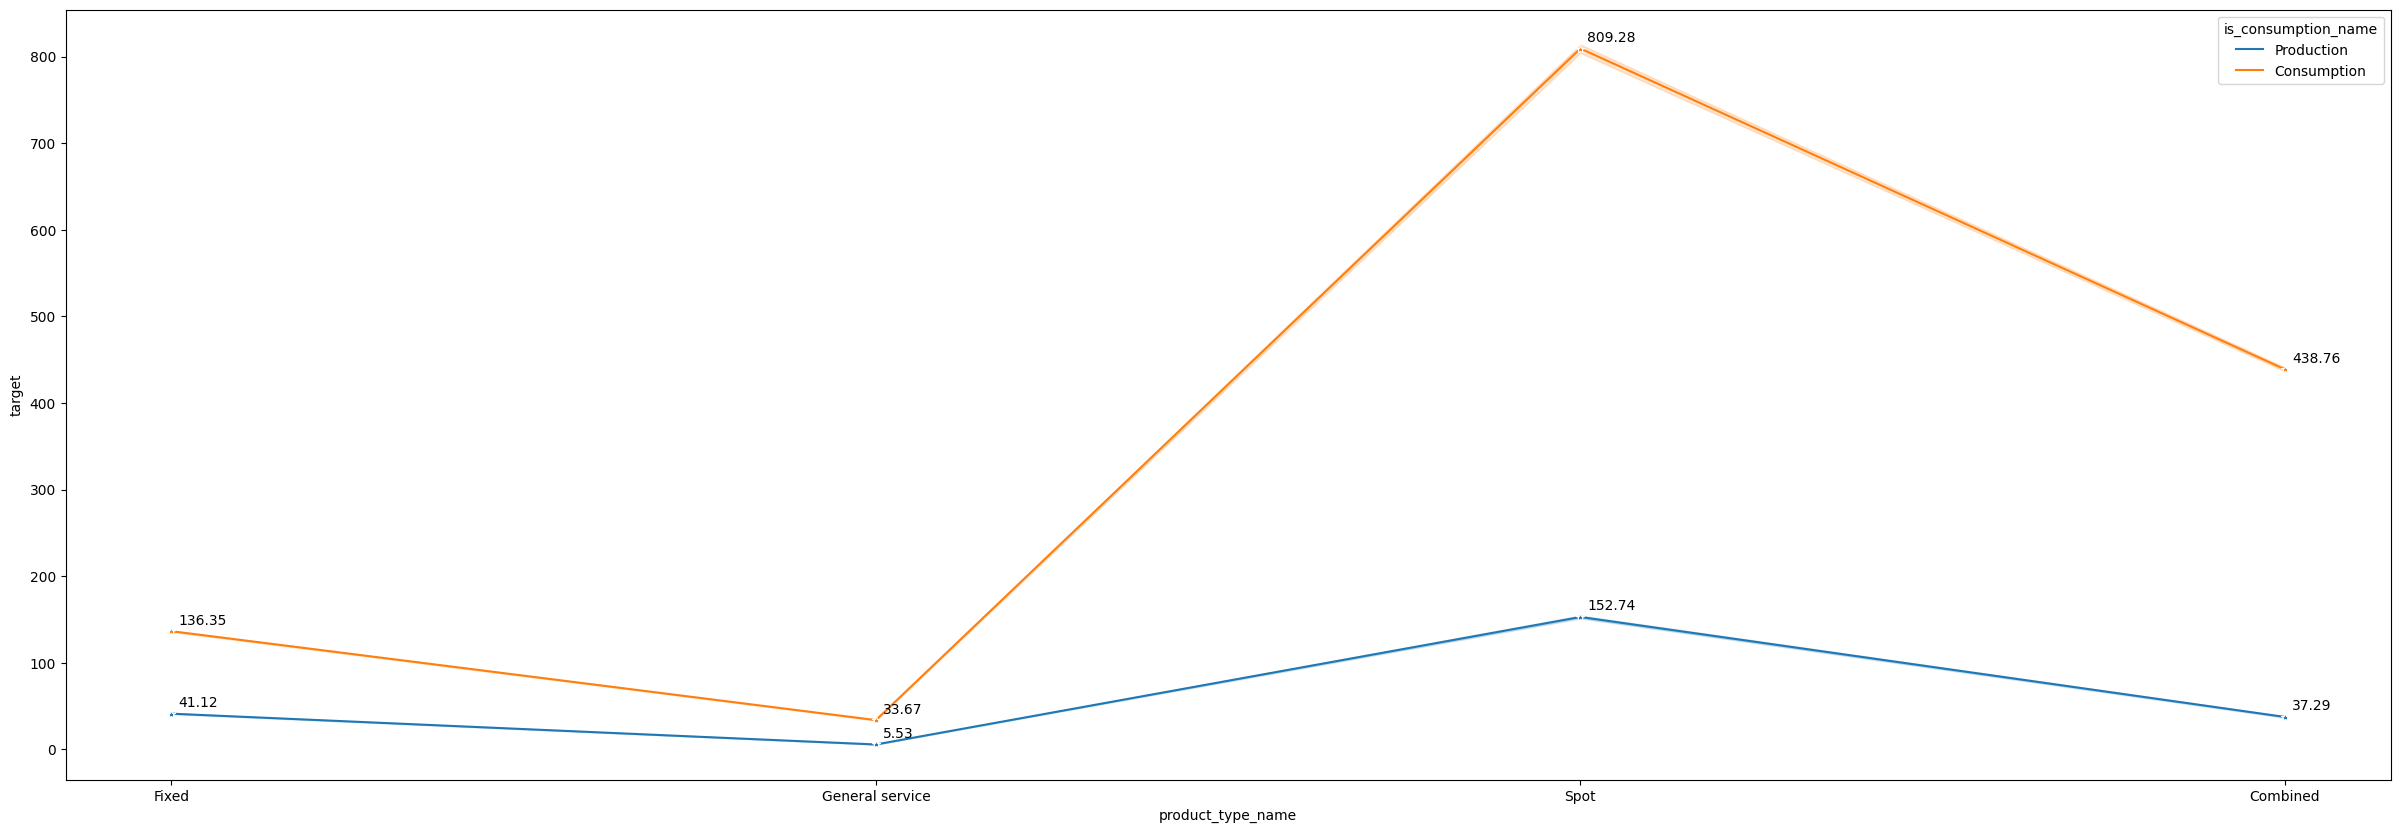

In [22]:
# Amount of Production & Consumption according to Product Type

plt.figure(figsize=(30,10))

ax = sns.lineplot(data=train_df, x='product_type_name', y='target', hue='is_consumption_name', marker='*')


for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

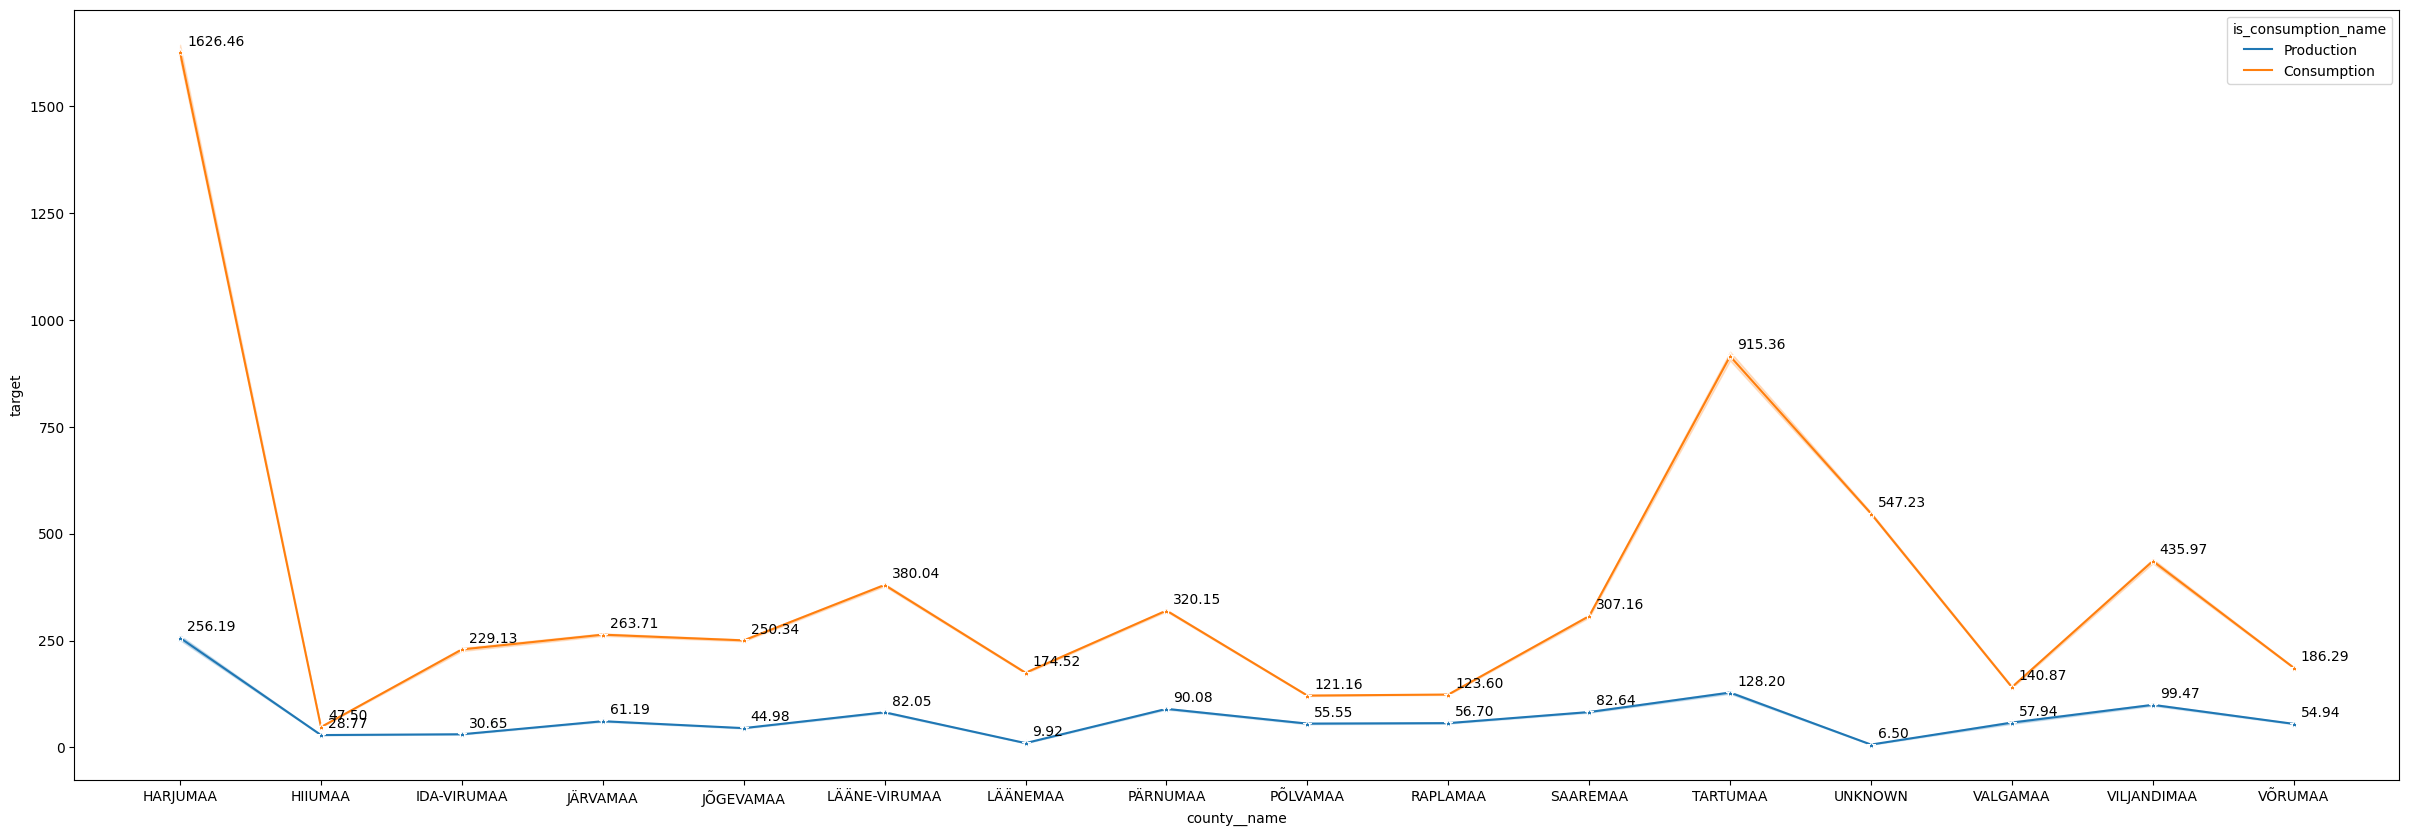

In [23]:
# Amount of Production & Consumption according to County

plt.figure(figsize=(30,10))

ax = sns.lineplot(data=train_df, x='county__name', y='target', hue='is_consumption_name', marker='*')


for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

In [24]:
client_df['is_business_name'] =  client_df['is_business'].astype('str').replace(is_business_code_to_name_map)
client_df['product_type_name'] =  client_df['product_type'].astype('str').replace(product_type_code_to_name_map)
client_df['county__name'] =  client_df['county'].astype('str').replace(county_id_to_name_map)

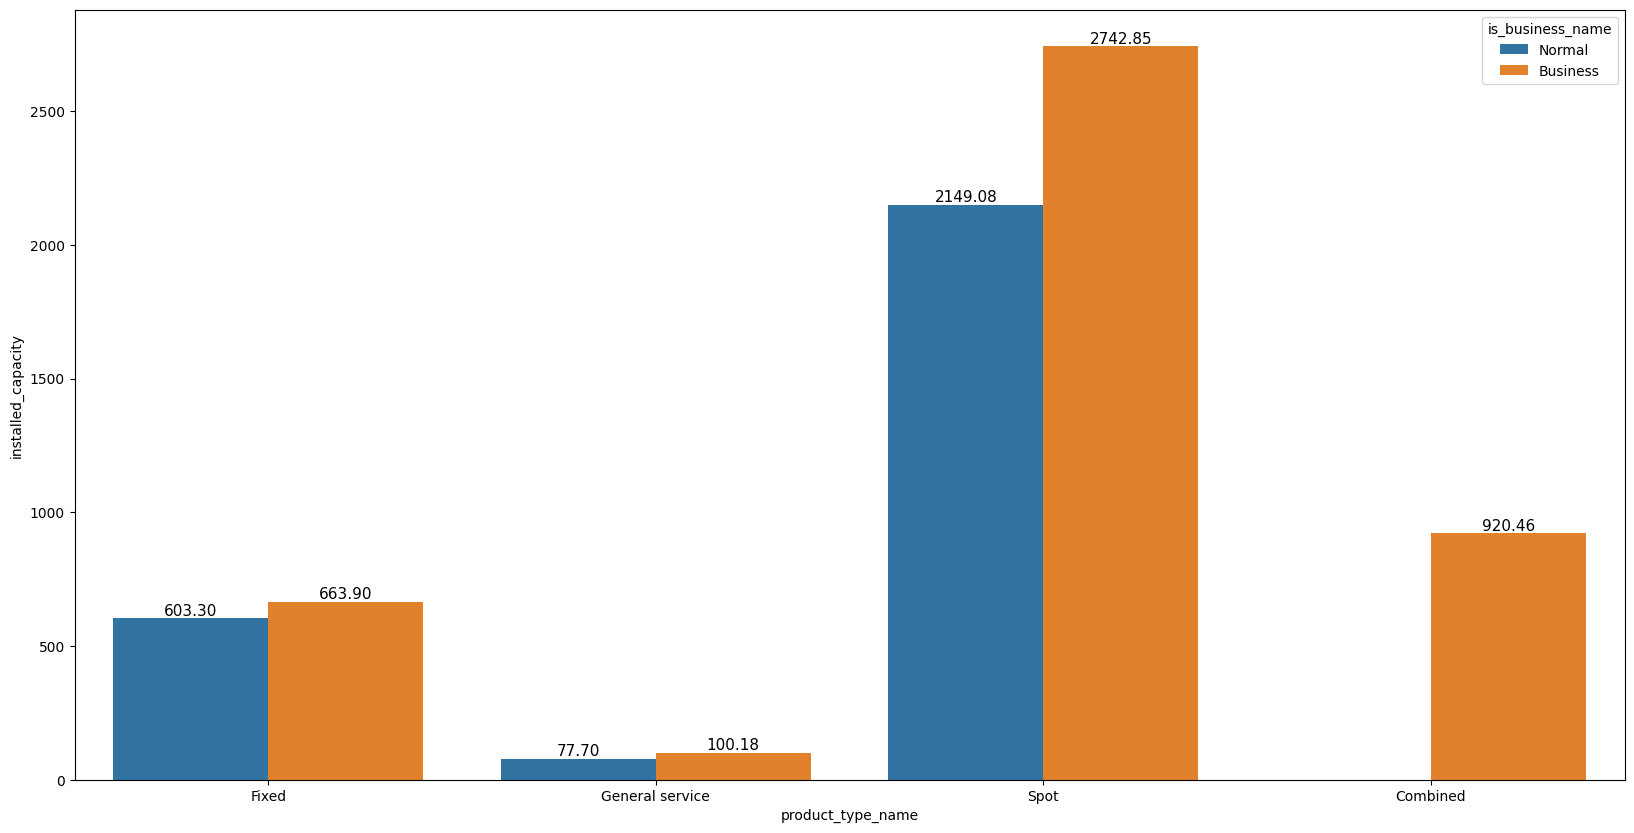

In [25]:
# Amount of Installed Capacity V/S Product Type according to business or Normal use.

plt.figure(figsize=(20,10))

ax = sns.barplot(data=client_df,x='product_type_name',y='installed_capacity',hue='is_business_name',errorbar=None)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{p.get_height():.2f}', 
            ha='center', va='bottom', fontsize=11, color='black')
plt.show()

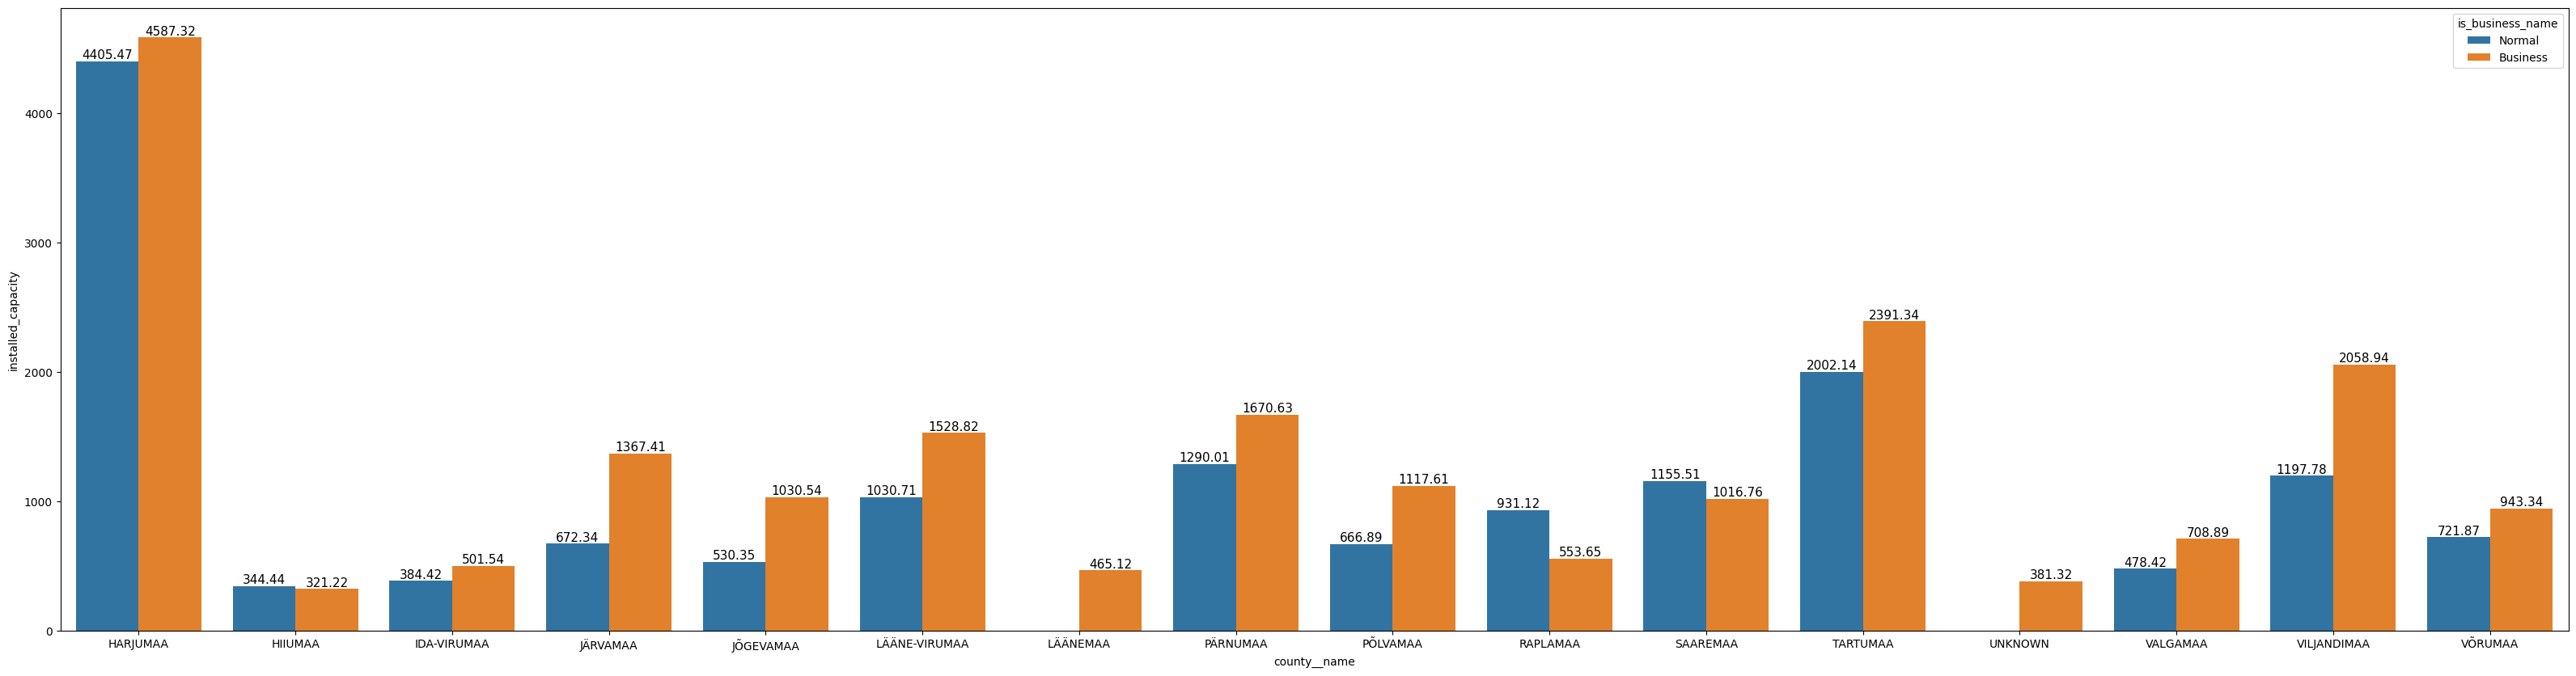

In [26]:
# Amount of Energy produce or consume according to county 

plt.figure(figsize=(40,10))

ax = sns.barplot(data=client_df,x='county__name',y='installed_capacity',hue='is_business_name',errorbar=None)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{p.get_height():.2f}', 
            ha='center', va='bottom', fontsize=11, color='black')
plt.show()

In [27]:
train_df['year'] = pd.to_datetime(train_df['datetime']).dt.year
train_df['month'] = pd.to_datetime(train_df['datetime']).dt.month
train_df['day'] =  pd.to_datetime(train_df['datetime']).dt.day
train_df['hour'] =  pd.to_datetime(train_df['datetime']).dt.hour

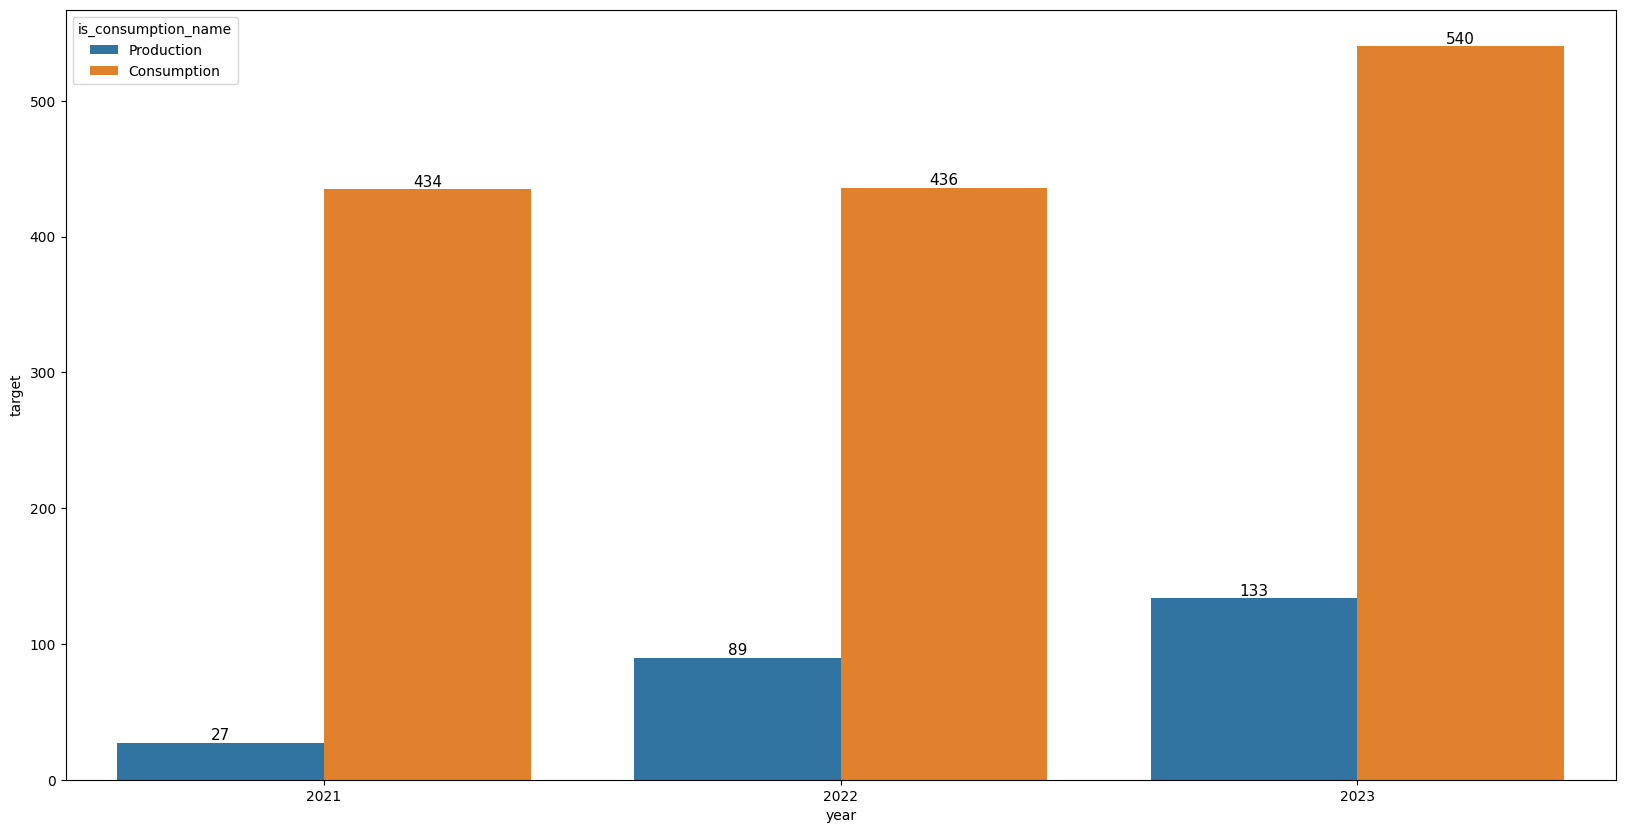

In [28]:
#  Amoutn of Energy Production or consumption as per year

plt.figure(figsize=(20,10))

ax = sns.barplot(data=train_df,x='year',y='target',hue='is_consumption_name',errorbar=None)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=11, color='black')

plt.show()

<Figure size 16000x1000 with 0 Axes>

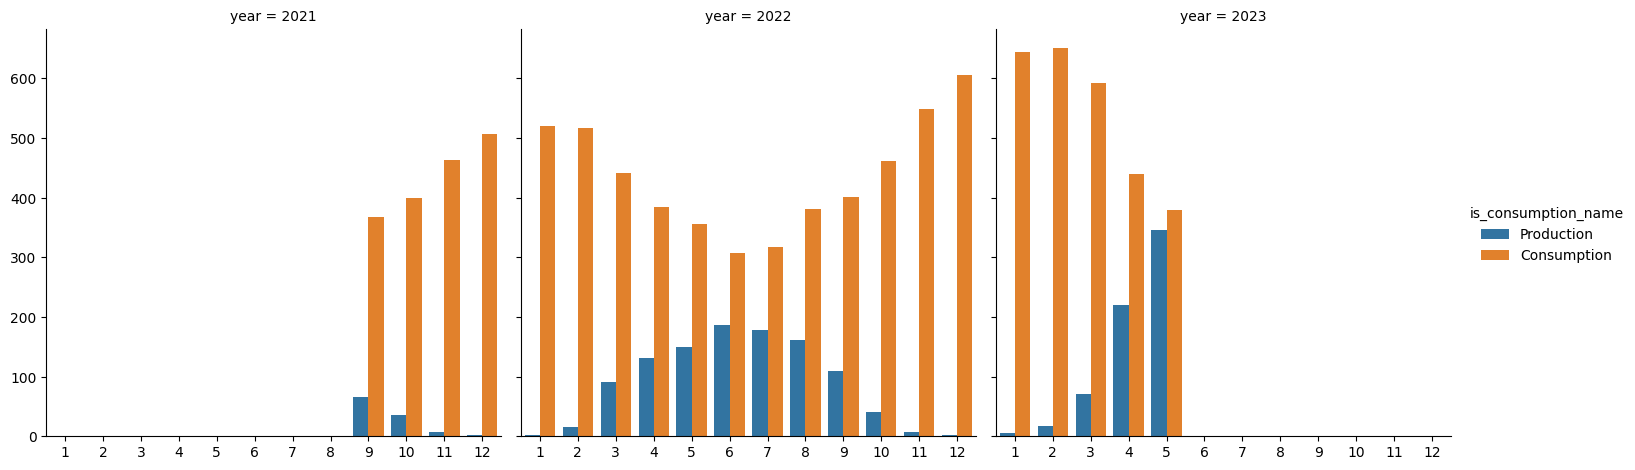

In [29]:
# Amount of Energy Production or Consumption according to month in Each year.

plt.figure(figsize=(160,10))

g = sns.catplot(
    data=train_df.melt(id_vars = ["year","month","is_consumption_name"], value_vars=["target"]),
    kind="bar",
    y="value", x="month", col="year", errorbar=None , hue='is_consumption_name'
)
g.set_axis_labels("", "")

plt.show()

In [30]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return None

In [31]:
train_df['season'] = train_df['month'].apply(lambda x : month_to_season(x))

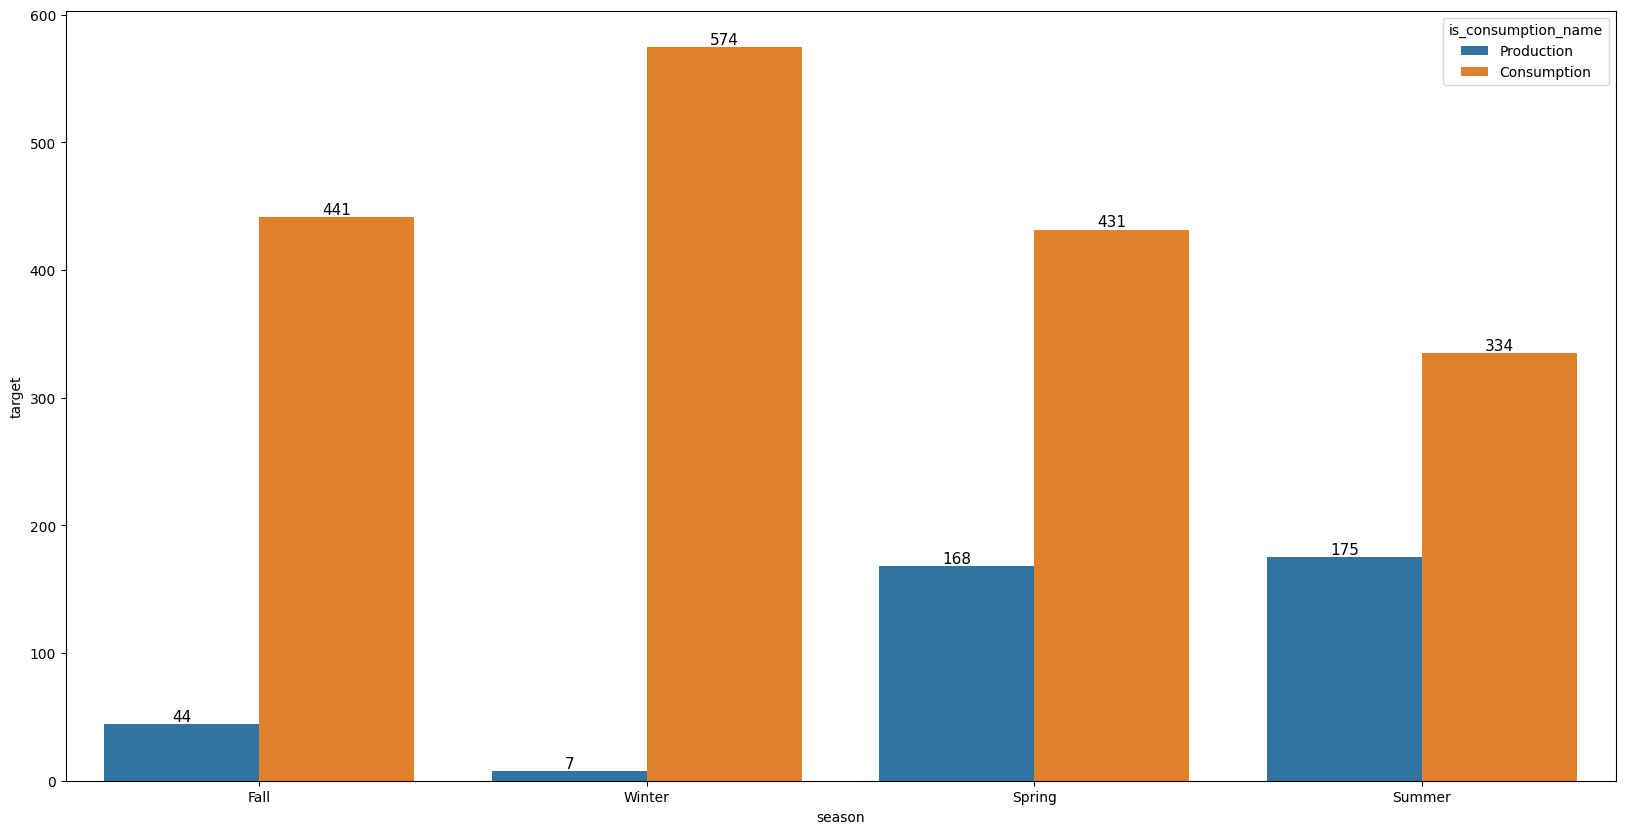

In [32]:
# Amount of Energy Production & Consumption according to seasons.

plt.figure(figsize=(20,10))

ax = sns.barplot(data=train_df,x='season',y='target',hue='is_consumption_name',errorbar=None)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 
            f'{int(p.get_height()):,}', 
            ha='center', va='bottom', fontsize=11, color='black')

plt.show()

<Figure size 16000x1000 with 0 Axes>

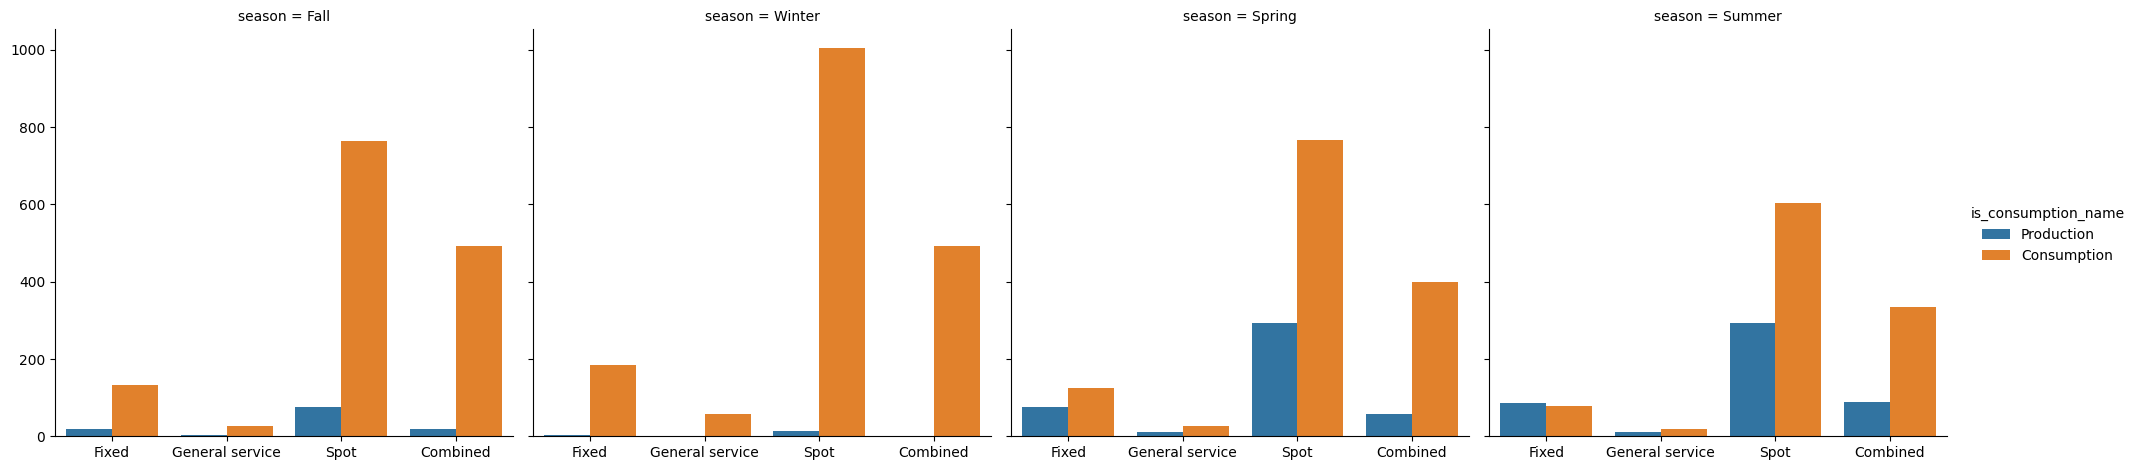

In [33]:
# Amount of Energy Production & Consumption of types of prosumers in each season.

plt.figure(figsize=(160,10))

g = sns.catplot(
    data=train_df.melt(id_vars = ["season","product_type_name","is_consumption_name"], value_vars=["target"]),
    kind="bar",
    y="value", x="product_type_name", col="season", errorbar=None , hue='is_consumption_name'
)
g.set_axis_labels("", "")

plt.show()

<Figure size 16000x1000 with 0 Axes>

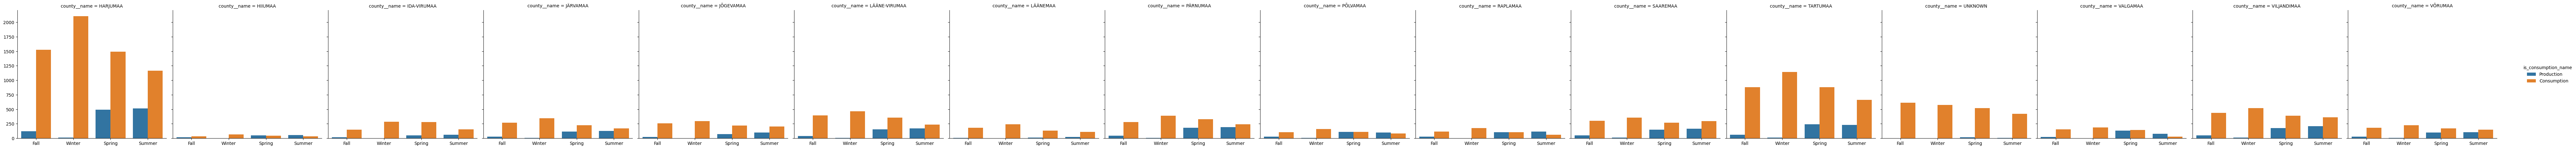

In [34]:
# Amount of Energy Production & Consumption according to seasons in each county.

plt.figure(figsize=(160,10))

g = sns.catplot(
    data=train_df.melt(id_vars = ["county__name","season","is_consumption_name"], value_vars=["target"]),
    kind="bar",
    y="value", x="season", col="county__name", errorbar=None , hue='is_consumption_name'
)
g.set_axis_labels("", "")

plt.show()

In [35]:
train_df['date'] = pd.to_datetime(train_df['datetime']).dt.date

In [36]:
historical_weather_df['date'] = pd.to_datetime(historical_weather_df['datetime']).dt.date

In [37]:
historical_weather_df = historical_weather_df.rename(columns={'date' : 'date_hist'})

In [38]:
historical_weather_df['year'] = pd.to_datetime(historical_weather_df['datetime']).dt.year
historical_weather_df['month'] = pd.to_datetime(historical_weather_df['datetime']).dt.month
historical_weather_df['day'] =  pd.to_datetime(historical_weather_df['datetime']).dt.day

In [39]:
historical_weather_df_2021 = historical_weather_df[historical_weather_df['year'] == 2021]

In [40]:
historical_weather_df_2021.columns

Index(['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall',
       'surface_pressure', 'cloudcover_total', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation', 'latitude', 'longitude', 'data_block_id',
       'date_hist', 'year', 'month', 'day'],
      dtype='object')

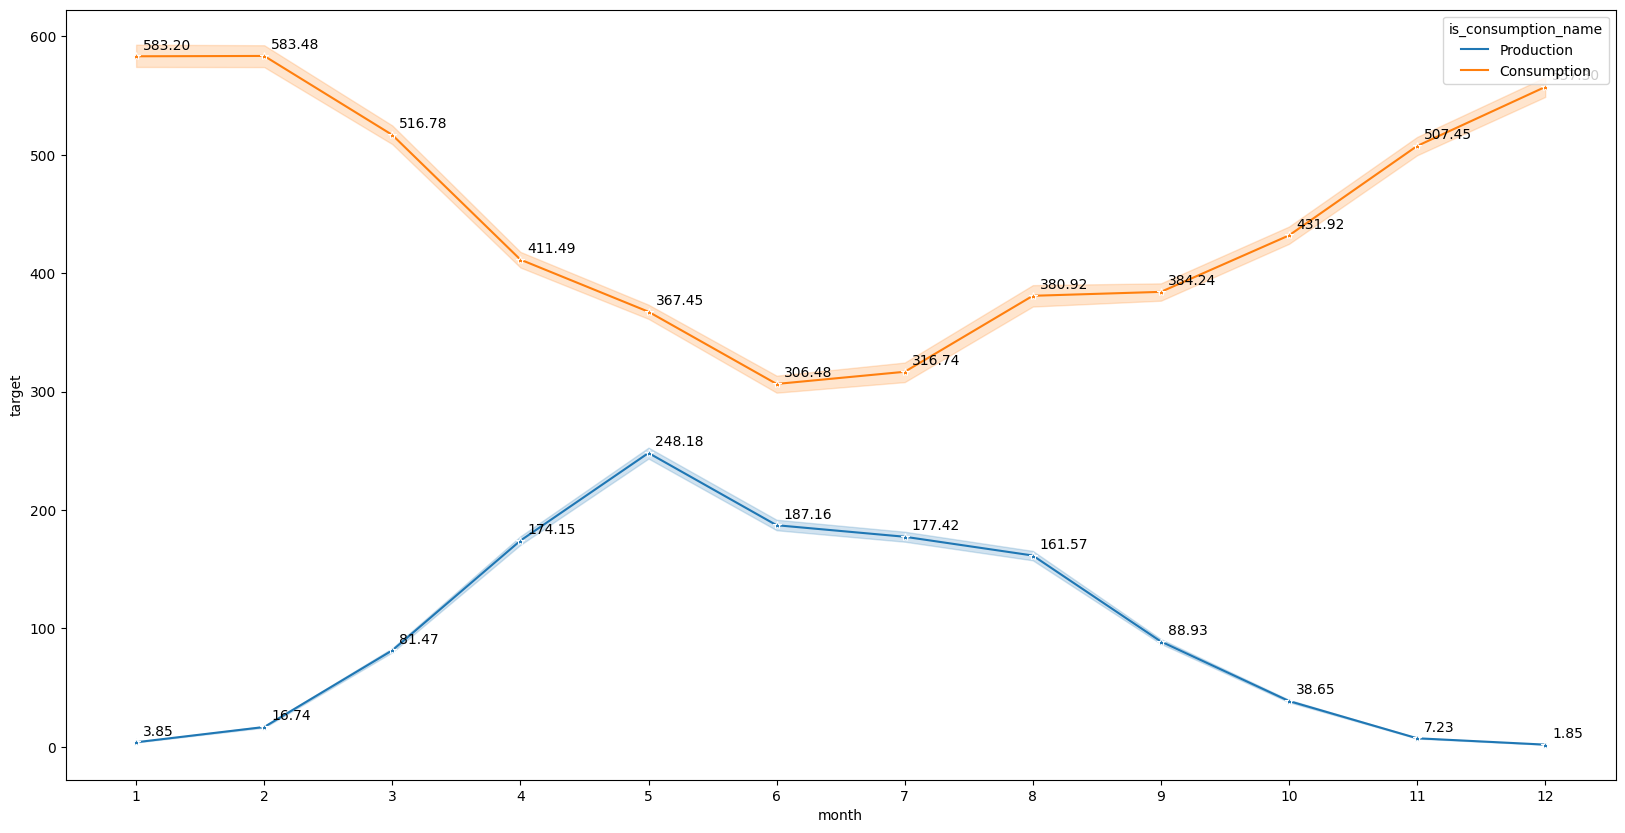

In [41]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=train_df, x='month', y='target', marker='*',hue='is_consumption_name')

ax.set_xticks(train_df['month'].unique())
        
for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

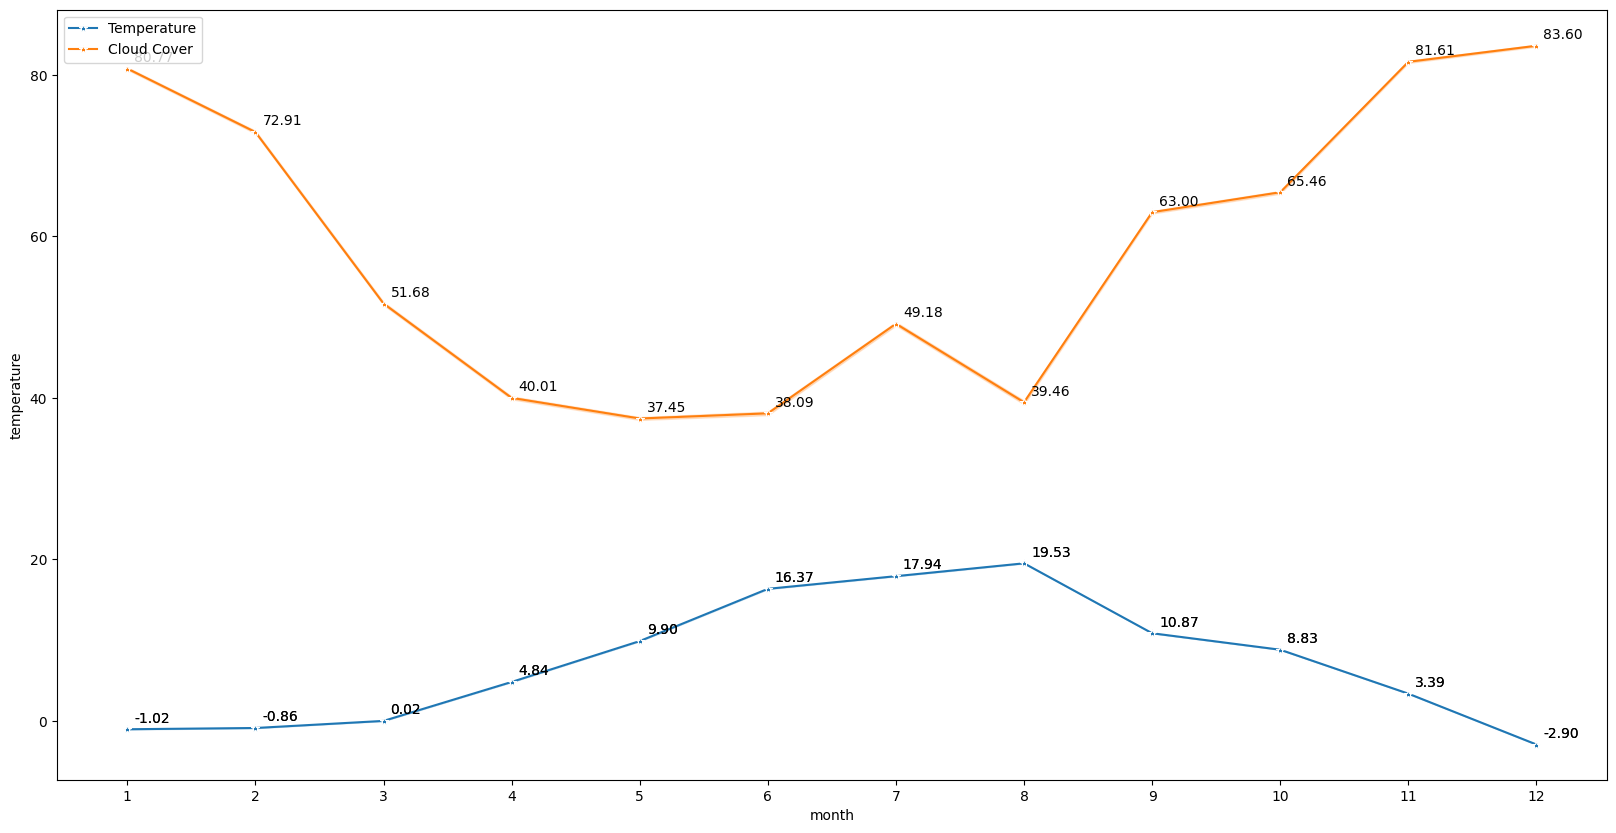

In [42]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=historical_weather_df, x='month', y='temperature', marker='*',label='Temperature')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        

ax_1 = sns.lineplot(data=historical_weather_df, x='month', y='cloudcover_total', marker='*', label='Cloud Cover')

for line in ax_1.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax_1.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        
        
plt.show()

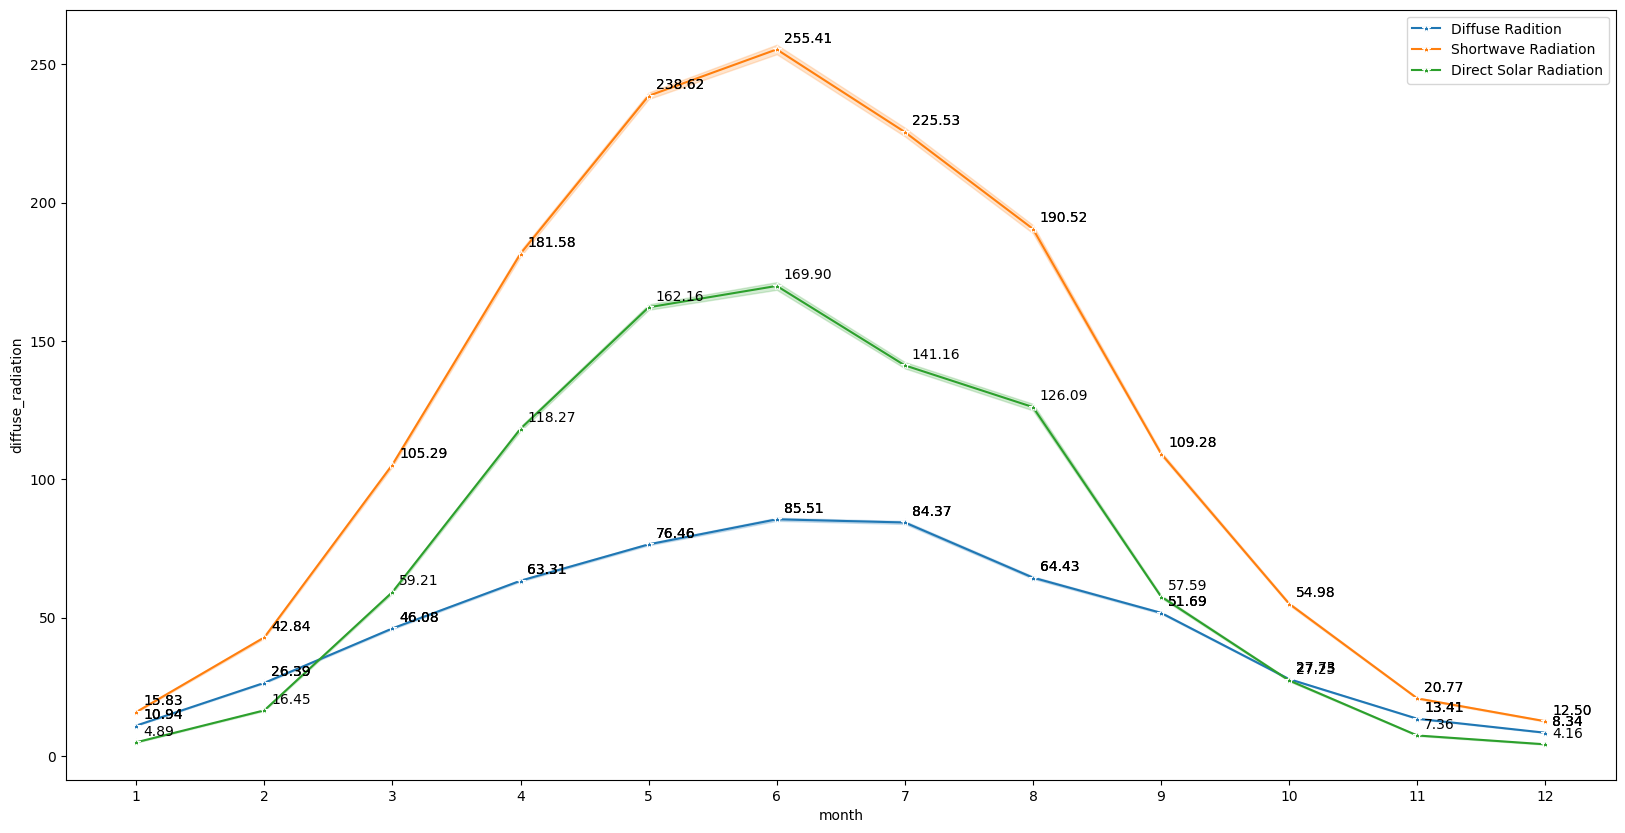

In [43]:
plt.figure(figsize=(20,10))


ax = sns.lineplot(data=historical_weather_df, x='month', y='diffuse_radiation', marker='*', label = 'Diffuse Radition')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')



ax_2 = sns.lineplot(data=historical_weather_df, x='month', y='shortwave_radiation', marker='*', label='Shortwave Radiation')

for line in ax_2.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax_2.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')

        
        
ax_3 = sns.lineplot(data=historical_weather_df, x='month', y='direct_solar_radiation', marker='*', label='Direct Solar Radiation')


for line in ax_3.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax_3.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')        
        
        
plt.show()

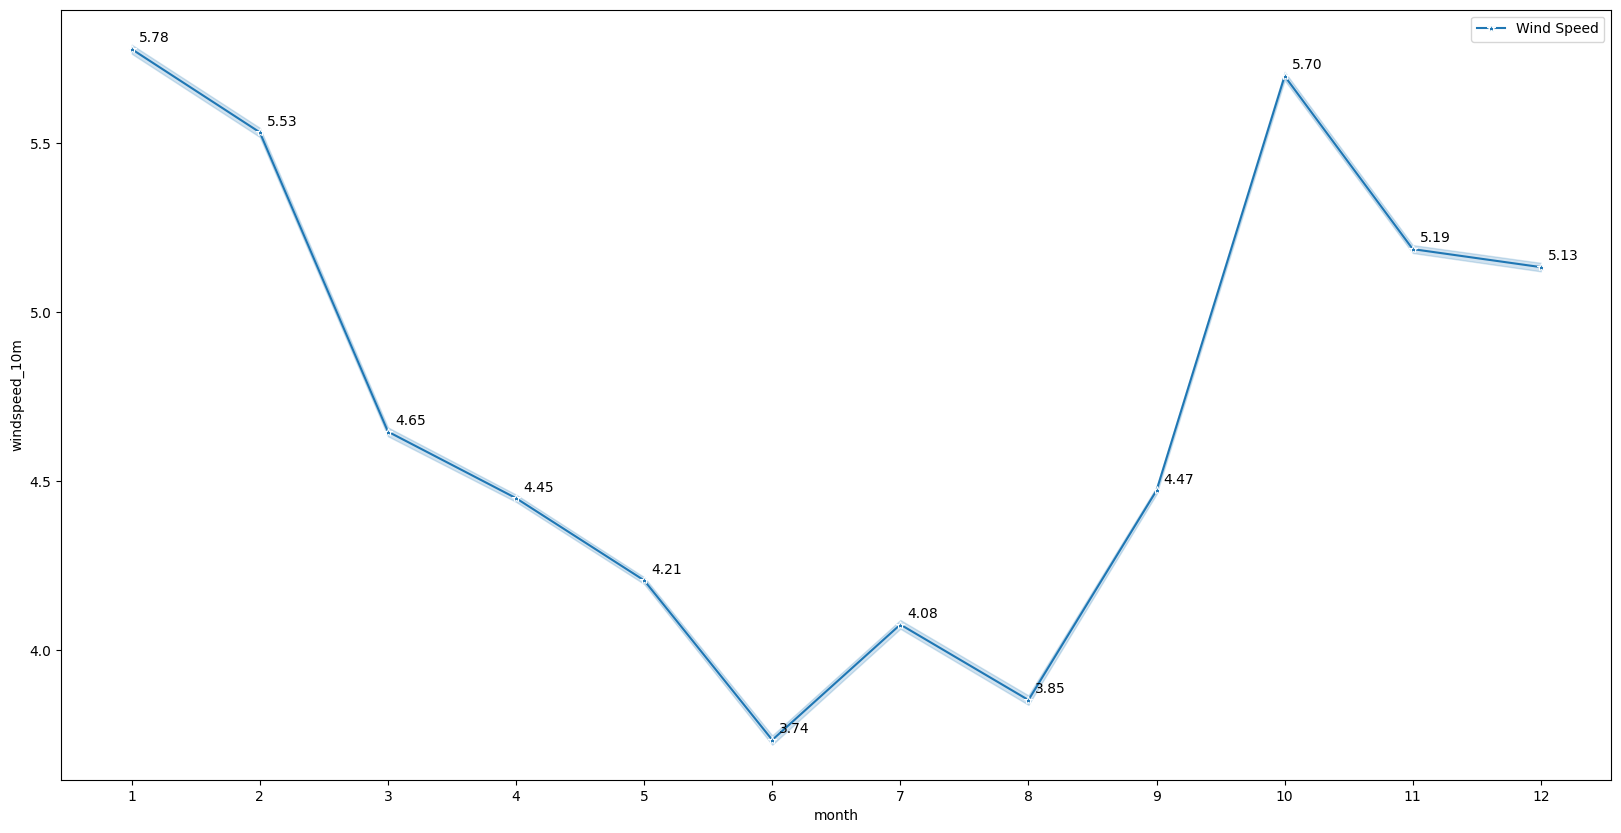

In [44]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=historical_weather_df, x='month', y='windspeed_10m', marker='*', label = 'Wind Speed')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

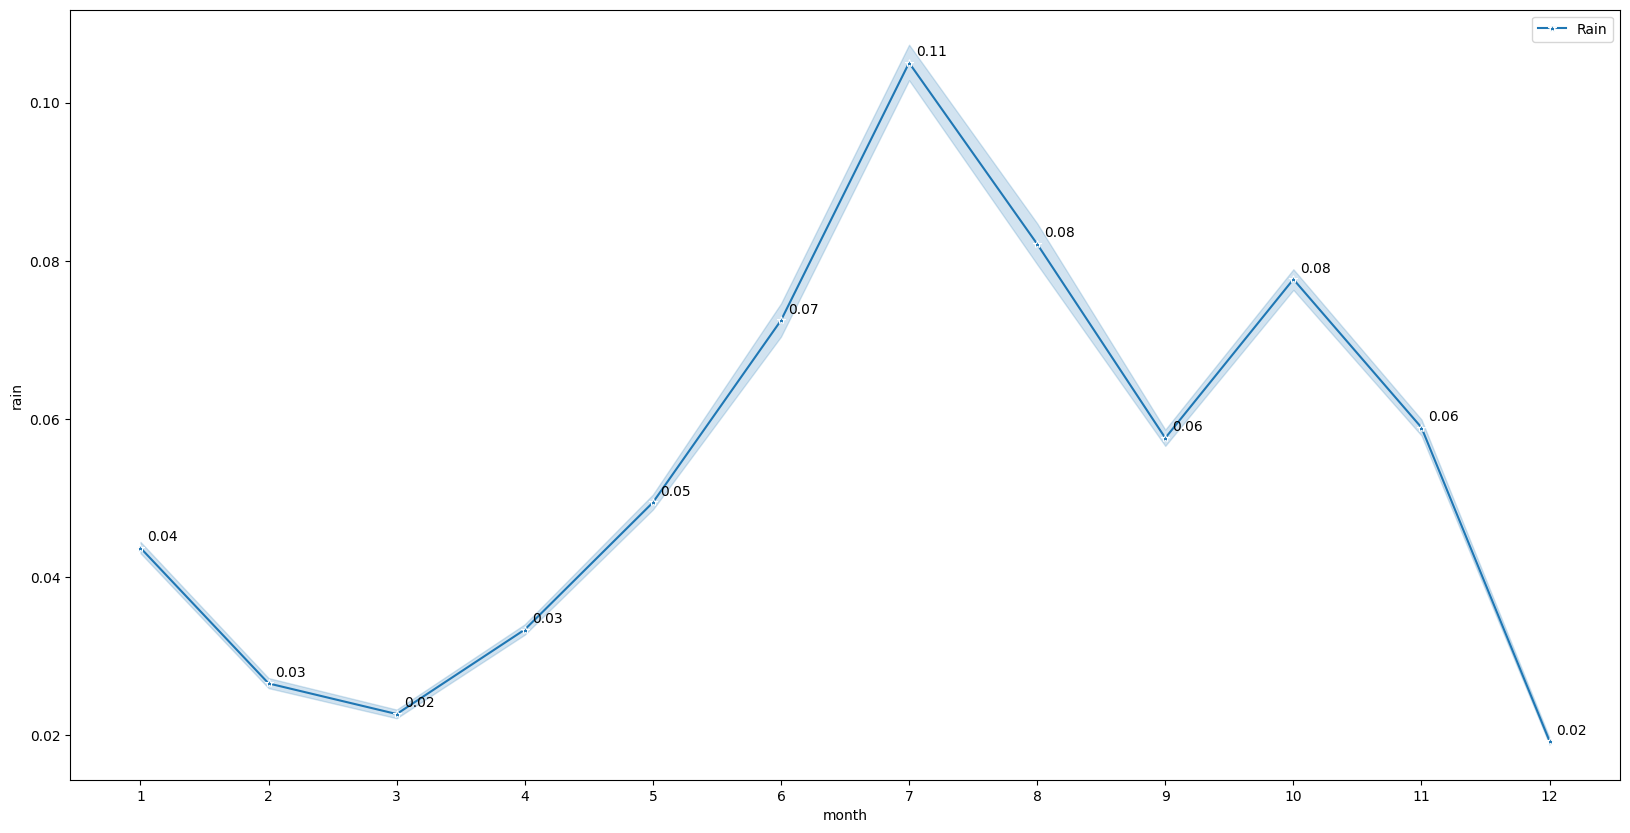

In [45]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=historical_weather_df, x='month', y='rain', marker='*', label = 'Rain')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

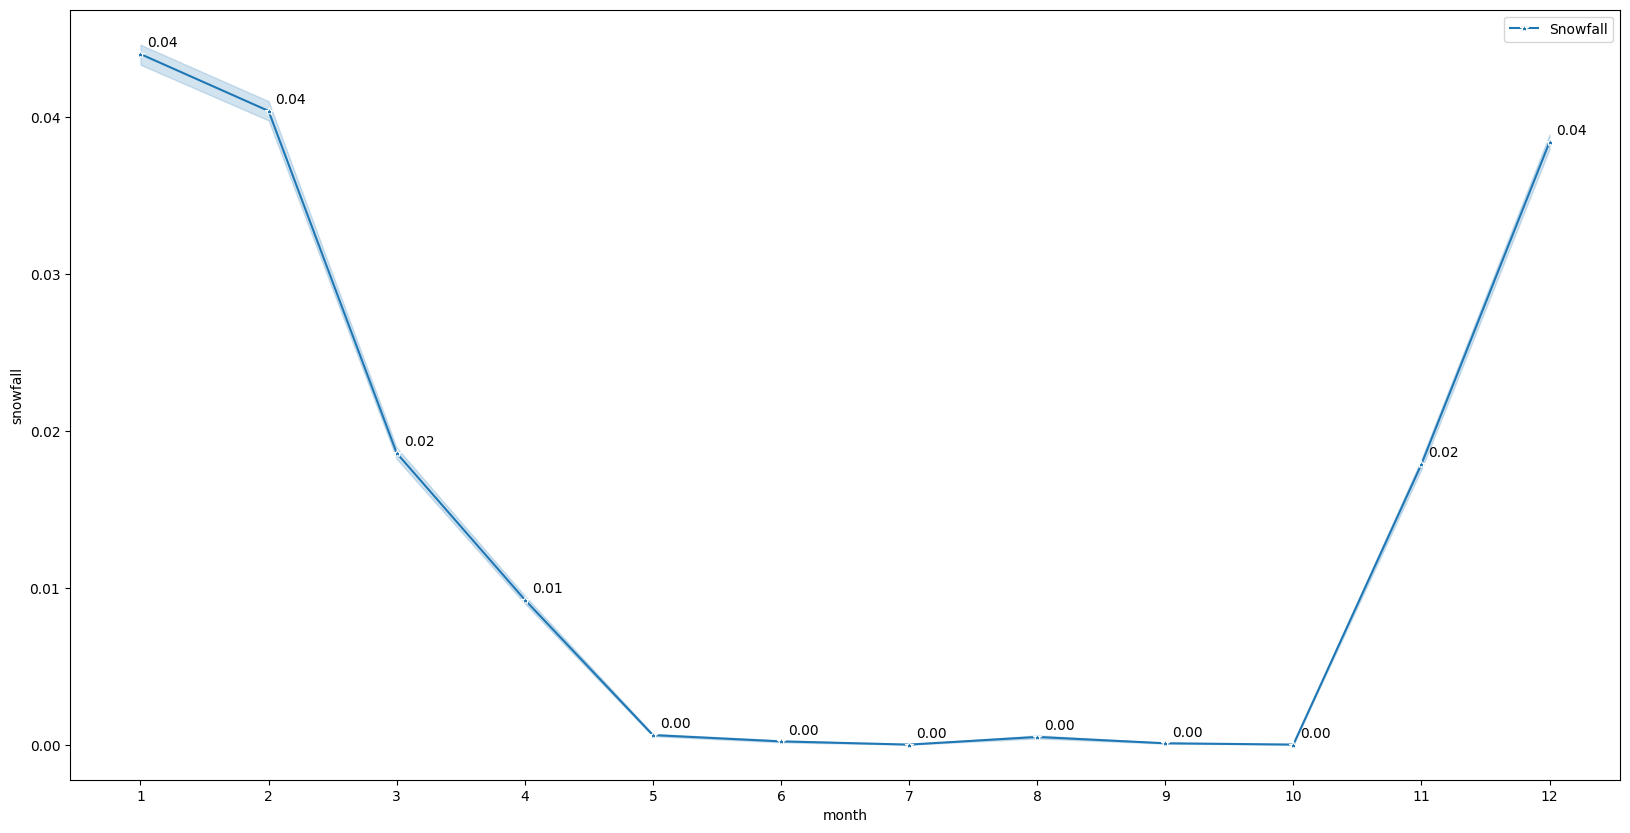

In [46]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=historical_weather_df, x='month', y='snowfall', marker='*', label = 'Snowfall')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()

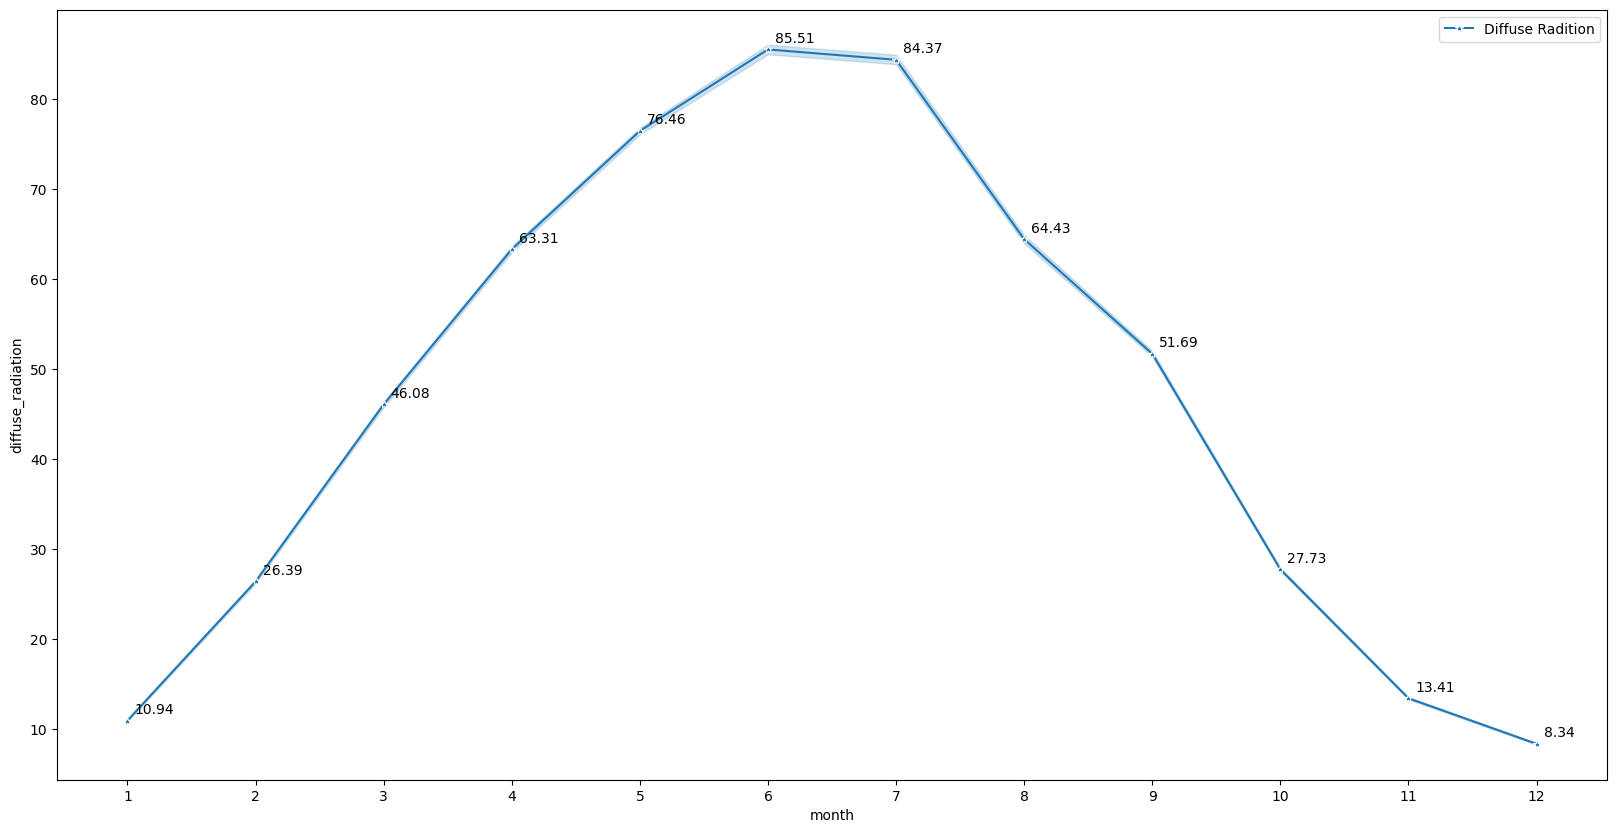

In [47]:
plt.figure(figsize=(20,10))

ax = sns.lineplot(data=historical_weather_df, x='month', y='diffuse_radiation', marker='*', label = 'Diffuse Radition')

ax.set_xticks(train_df['month'].unique())

for line in ax.lines:
    y_values = line.get_ydata()
    for i, y in enumerate(y_values):
        x = line.get_xdata()[i]
        ax.annotate(f'{y:.2f}',  xy=(x, y), xytext=(5, 5), textcoords='offset points')
        
        

plt.show()